In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

df=pd.read_excel("Merged_Dataset.xlsx")
df.rename(columns={"Rates of all crimes": "Crime rates (per 100,000 population)", 
                   "Real personal income": "Real personal income (million dollars)",
                   "Unemployment_rate": "Unemployment_rate (%)", 
                   "Percentage with high school completion or higher (%)  total": 
                   "Percentage of population who completed high school (%)"},
                    inplace=True)
#Rates are the number of reported offenses per 100,000 population
#Real personal income is in the unit of million dollars
#Unemployment rate is the actual percentage
#Percentage with high school completion or higher is the % of population who completed high school
df

,Unnamed: 0,Postal Abbr.,State,Year,Civilian_labor_force,Employed,Unemployed,Unemployment_rate (%),Disposable personal income,Gross domestic product (GDP),...,Total violent robbery,No. of persons 25 and over (in thou) Total,No. of persons 25 and over (in thou) Male,No. of persons 25 and over (in thou) Female,Percentage of population who completed high school (%),Percentage with high school completion or higher (%) Male,Percentage with high school completion or higher (%) Female,Percentage with bachelor's or higher degree (%) total,Percentage with bachelor's or higher degree (%) Male,Percentage with bachelor's or higher degree (%) Female
0,0,AL,Alabama,2013,2172102,2012828,159274,7.3,159063.1,194786.9,...,4648,3226,1525,1701,84.9,84.0,85.7,23.5,23.4,23.5
1,1,AL,Alabama,2014,2164715,2018705,146010,6.7,164562.8,197406.9,...,4701,3259,1536,1723,84.6,83.7,85.5,23.0,22.7,23.3
2,2,AL,Alabama,2015,2152295,2020443,131852,6.1,171157.0,202372.4,...,4611,3283,1550,1733,85.1,84.1,86.1,24.0,23.7,24.3
3,3,AL,Alabama,2016,2155729,2029157,126572,5.9,173653.1,207368.4,...,4686,3300,1558,1742,84.9,83.3,86.3,24.7,24.5,24.9
4,4,AL,Alabama,2017,2203458,2103873,99585,4.5,180348.3,214606.3,...,4217,3314,1569,1745,86.0,85.0,86.9,25.6,24.7,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,352,WY,Wyoming,2015,301608,288894,12714,4.2,30239.2,38426.9,...,59,388,191,197,93.2,93.2,93.1,26.9,26.6,27.1
353,353,WY,Wyoming,2016,300546,284439,16107,5.4,28807.8,35879.0,...,59,391,199,192,93.2,93.0,93.5,26.5,25.5,27.6
354,354,WY,Wyoming,2017,293802,281164,12638,4.3,29625.5,36980.7,...,76,389,198,190,93.1,92.7,93.4,27.6,25.9,29.3
355,355,WY,Wyoming,2018,292629,280754,11875,4.1,31548.4,39171.7,...,100,394,200,194,92.7,92.5,93.0,27.0,25.6,28.4


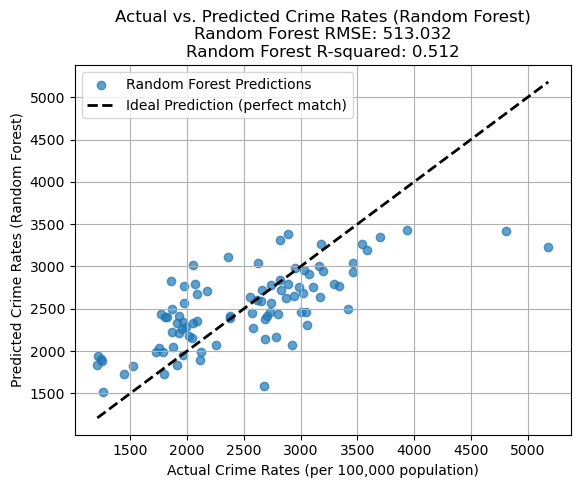

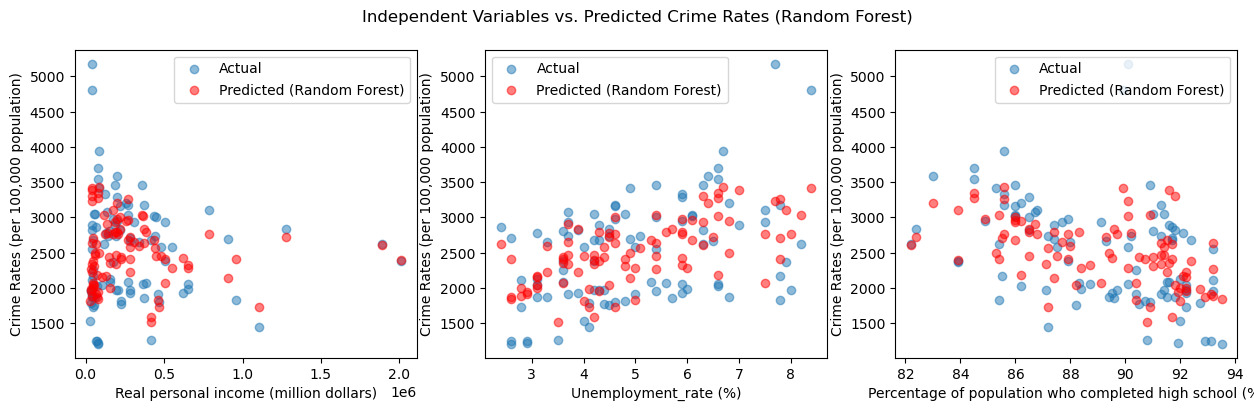

In [4]:
import pandas as pd
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data into a DataFrame
X = df[['Real personal income (million dollars)',
        'Unemployment_rate (%)', 
        'Percentage of population who completed high school (%)']]
y = df['Crime rates (per 100,000 population)']

# Split the data into training and testing sets(0.75/0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and fit a Random Forest regression model
rf_regr = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regr.fit(X_train, y_train)

# Predict the values
y_pred_rf = rf_regr.predict(X_test)

# Calculate RMSE for Random Forest
rmse_rf = metrics.mean_squared_error(y_test, y_pred_rf, squared=False)

# Calculate R-squared for Random Forest
r_squared_rf = rf_regr.score(X_test, y_test)

# Plot the data and Random Forest predictions(Ideal prediction(y=x) vs Actual predictions)
plt.scatter(y_test, y_pred_rf, label='Random Forest Predictions', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction (perfect match)')
plt.xlabel("Actual Crime Rates (per 100,000 population)")
plt.ylabel("Predicted Crime Rates (Random Forest)")
plt.title(f"Actual vs. Predicted Crime Rates (Random Forest)\nRandom Forest RMSE: {rmse_rf:.3f}\nRandom Forest R-squared: {r_squared_rf:.3f}")
plt.legend()
plt.grid(True)

# Create subplots for each independent variable
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot each independent variable against predicted crime rates
for i, col in enumerate(X.columns):
    axs[i].scatter(X_test[col], y_test, label='Actual', alpha=0.5)
    axs[i].scatter(X_test[col], y_pred_rf, label='Predicted (Random Forest)', color='red', alpha=0.5)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Crime Rates (per 100,000 population)")
    axs[i].legend()

# Add a title to the entire figure
plt.suptitle("Independent Variables vs. Predicted Crime Rates (Random Forest)")

# Show the plot
plt.show()

